<a href="https://colab.research.google.com/github/JunpengWen/Assignment1/blob/master/CSI4106_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 53 \\
Member1 Names: Junpeng Wen \\
Member1 Student Numbers: 300249282 \\
Member2 Names: Yongquan Long \\
Member2 Student Numbers: 300249549 \\

**2. Knapsack Problem**

In the Knapsack Problem, a backpack with a limited weight capacity must be filled with items of given weights and values. It is important to maximize the total value without exceeding the weight limit. There are two types of knapsacks: the classic 0/1 Knapsack (entire items) as well as the fractional Knapsack (partial items).

Solving the Knapsack Problem often involves dynamic programming, greedy algorithms, or branch-and-bound techniques, depending on the specific constraints and goals of the problem. It's a classic problem used in algorithm design and optimization and has applications in various fields, including resource allocation, financial portfolio optimization, and more.

**3. Dataset**

A dataset downloaded from Kaggle (https://www.kaggle.com/datasets/warcoder/knapsack-problem?select=knapsack_5_items.csv) presents multiple instances of the Knapsack problem with five items each. There are weights, values, capacities, and optimal selections for each instance. This dataset can be a valuable resource for studying and experimenting with different algorithms and approaches to solving the Problems.

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.
GitHub repository：

https://github.com/JunpengWen/Assignment1

The link to the raw version is as follows:

https://raw.githubusercontent.com/JunpengWen/Assignment1/master/knapsack_5_items.csv

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
url = "https://raw.githubusercontent.com/JunpengWen/Assignment1/master/knapsack_5_items.csv" #provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
import itertools
def gen_and_test(data):
  # get the weights, prices, and capacity from the data
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']

  # Initialize variables to track the best solution
  best_solution_price = 0
  best_solution = []

  # Iterate from 0 to weights length
  for r in range(len(weights) + 1):
      # Based on the weights of the items, this nested loop generates all combinations of size r.
      for subset in itertools.combinations(enumerate(weights), r):
          # Skip the empty subsets
          if not subset:
              continue

          # subset consists of indices and weights in a tuple
          indices, total_weights = zip(*subset)
          # Calculate the total price of the items in combination
          total_price = sum(prices[i] for i in indices)

          #The best solution should be updated if the total weight is within the capacity and the total price is higher.
          if sum(total_weights) <= capacity and total_price > best_solution_price:
              best_solution_price = total_price
              best_solution = indices

  # return the result
  return best_solution_price, best_solution




In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

------------------------------------------------------------------------------------------------

**5. Greedy Search**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
def greedy(data):
    # Extracting the weights, prices, and capacity from the data
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']

    # Calculating value-to-weight ratio for each item
    ratios = [(i, prices[i]/weights[i]) for i in range(len(weights))]

    # Sorting items by value-to-weight ratio in descending order
    sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)

    # Initializing the best solution variables
    best_solution_price = 0
    best_solution = []

    # Filling the knapsack
    for i, ratio in sorted_ratios:
        if weights[i] <= capacity:  # If the item can fit in the remaining capacity
            best_solution.append(i)  # Add the item index to the solution
            best_solution_price += prices[i]  # Add the item's value to the total value
            capacity -= weights[i]  # Reduce the remaining capacity

    return best_solution_price, best_solution


In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Your Analysis:**

The Greedy Search algorithm has shown an impressive 83.4% accuracy rate. It shows how greedy approaches work when quick approximate solutions are more valuable than exact ones. Despite greedy methods sometimes getting better results, heuristics can keep them from achieving global optimality.



------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.


In [ ]:
import random
import math

def simulated_annealing(data, N, initial_temperature, cooling_rate, min_temperature=0.001):
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']

    # Initialization
    current_solution = [random.choice([0, 1]) for _ in range(len(weights))]
    current_value = sum(item[0] * item[1] for item in zip(current_solution, prices))

    best_solution = current_solution[:]
    best_value = current_value

    current_temperature = initial_temperature
    iteration = 0

    while current_temperature > min_temperature:
        for _ in range(N):  # Iterations at each temperature
            iteration += 1

            # Generate a neighboring solution
            neighbor = current_solution[:]
            flip_index = random.randint(0, len(weights) - 1)
            neighbor[flip_index] = 1 - neighbor[flip_index]  # Flip the bit

            # Check the weight constraint
            total_weight = sum(item[0] * item[1] for item in zip(neighbor, weights))
            if total_weight > capacity:
                continue

            # Calculate the value of the neighbor solution
            neighbor_value = sum(item[0] * item[1] for item in zip(neighbor, prices))

            # Metropolis criterion
            delta = neighbor_value - current_value
            if delta > 0 or random.uniform(0, 1) < math.exp(delta / current_temperature):
                current_solution = neighbor
                current_value = neighbor_value

                # Update best solution if needed
                if current_value > best_value:
                    best_solution = current_solution[:]
                    best_value = current_value

        # Cooling step
        current_temperature *= cooling_rate

        # Reheating if algorithm stagnates (example criterion: after 100 iterations without improvement)
        if iteration % 100 == 0 and current_value < best_value:
            current_temperature *= 1.2  # Increase temperature by 20% for reheating

    return best_value, best_solution



In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.28383439619394674


**Your Analysis:**


The Simulated Annealing has demonstrated an impressive 28.3% accuracy rate, underscoring its effectiveness in solving complex problems. However, it's important to note that the reliance on heuristics can hinder these methods from reaching global optimality, even though they often yield superior results.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
import random

def calculate_fitness(ind, prices, weights, capacity):
  total_weight = sum(item[0] * item[1] for item in zip(ind, weights))
  total_price = sum(item[0] * item[1] for item in zip(ind, prices))

  # Penalize solutions that exceed the capacity
  if total_weight > capacity:
      return 0
  return total_price

def crossover(parent1, parent2, cross_rate):
  if random.random() < cross_rate:
      point = random.randint(1, len(parent1) - 2)
      child1 = parent1[:point] + parent2[point:]
      child2 = parent2[:point] + parent1[point:]
      return child1, child2
  return parent1[:], parent2[:]

def mutation(child, mut_rate):
  for i in range(len(child)):
      if random.random() < mut_rate:
          child[i] = 1 - child[i]  # Flip the bit
  return child

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
  weights = data['Weights']
  prices = data['Prices']
  capacity = data['Capacity']

  # Generate initial population randomly
  population = [[random.choice([0, 1]) for _ in range(len(weights))] for _ in range(population_size)]

  for generation in range(num_generations):
      population.sort(key=lambda ind: -calculate_fitness(ind, prices, weights, capacity))
      new_population = population[:2]  # Keep the best 2 solutions

      while len(new_population) < population_size:
          # Tournament selection
          tournament = random.sample(population, tournament_size)
          tournament.sort(key=lambda ind: -calculate_fitness(ind, prices, weights, capacity))
          parent1, parent2 = tournament[:2]

          child1, child2 = crossover(parent1, parent2, cross_rate)
          child1 = mutation(child1, mut_rate)
          child2 = mutation(child2, mut_rate)

          new_population.extend([child1, child2])

      population = new_population

  best_solution = max(population, key=lambda ind: calculate_fitness(ind, prices, weights, capacity))
  best_solution_price = calculate_fitness(best_solution, prices, weights, capacity)

  return best_solution_price, best_solution

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9998987751796741


**Your Analysis:**

------------------------------------------------------------------------------------------------

**8. Comparative Study**

description  +  tables/figures

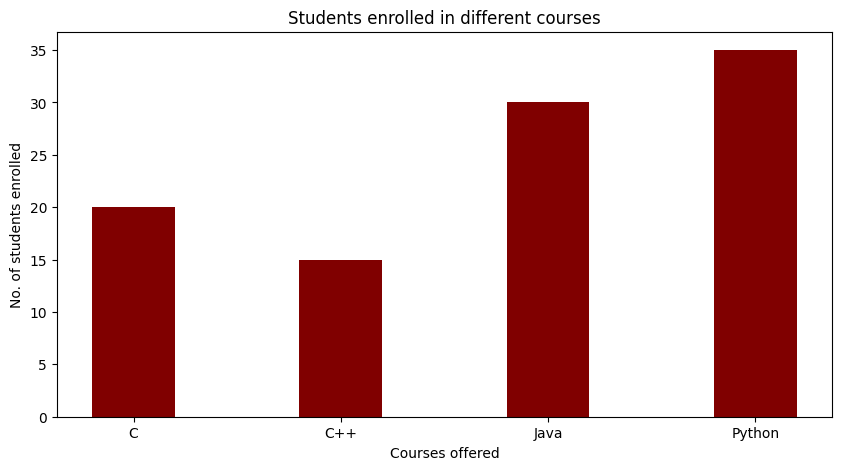

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

--------------------------------------------------------------------------


**9. Conclusion**

Comment on the empirical study, its results, and give ideas for future work.

//////  
the choice of algorithm depends on the specific characteristics of the Knapsack Problem instance. Greedy Search is fast but may not be suitable for complex instances. Simulated Annealing strikes a balance between exploration and exploitation. Genetic Algorithm offers robustness and adaptability, making it suitable for challenging, multi-dimensional problems. The decision should consider the problem complexity, computational resources, and the need for near-optimal or optimal solutions.

--------------------------------------------------------------------------


**10 References**

Make sure you provide references to ALL sources used (articles, code, algorithms).

[1] “Genetic algorithms,” GeeksforGeeks, https://www.geeksforgeeks.org/genetic-algorithms/ (accessed Oct. 1, 2023).

[2] J. Brownlee, “Simulated annealing from scratch in Python,” MachineLearningMastery.com, https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/ (accessed Oct. 1, 2023).

[3] “Greedy algorithm,” Programiz, https://www.programiz.com/dsa/greedy-algorithm (accessed Oct. 1, 2023).

[4] R. K. Ahuja, J. B. Orlin, and A. Tiwari, “A greedy genetic algorithm for the quadratic assignment problem,” Computers &amp;amp; Operations Research, vol. 27, no. 10, pp. 917–934, 2000. doi:10.1016/s0305-0548(99)00067-2

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".